# Computer Vision HW2

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

Q2 - Part 1

In [5]:
img = cv2.imread('img1.jpg',cv2.IMREAD_GRAYSCALE)

In [6]:
def calc_hist(image):
  pixels=[]
  for x in range(256):
    pixels.append(x)
  width,height=img.shape
  counts=[]
  for i in pixels:
    temp=0
    for x in range(width):
      for y in range(height):
        if (img[x][y]==i):
          temp=temp+1
    counts.append(temp)
  plt.bar(pixels,counts)
  plt.show()

**compute histogram with opencv**

In [8]:
############
# Your code
# Start
cv_hist = cv2.calcHist([img],[0],None,[256],[0,256])
# End

test **(don't change next cell)**

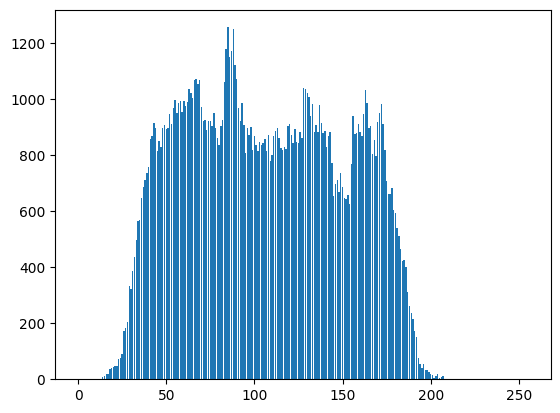

In [7]:
calc_hist(img)

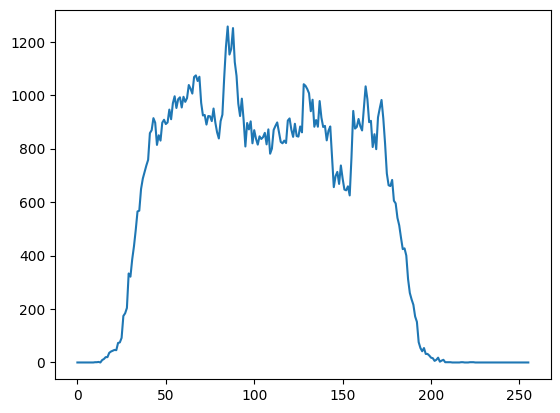

In [10]:
plt.plot(cv_hist)
plt.show()

Q2 - Part 2

In [59]:
img = cv2.imread('img2.jpg',cv2.IMREAD_GRAYSCALE)

In [60]:
def stretch_hist(img):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  #output_image = image.copy()
  constant = (255-0)/(img.max()-img.min()+2)
  out = np.round(constant*(img-img.min()+1)).astype(img.dtype) # stretched values
  out[img<img.min()] = 0
  out[img>img.max()] = 255
  #img_stretch = img * constant
  return out
  

test **(don't change next cell)**

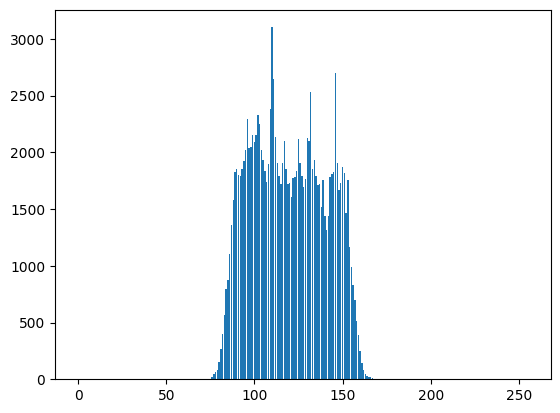

In [40]:
calc_hist(img)

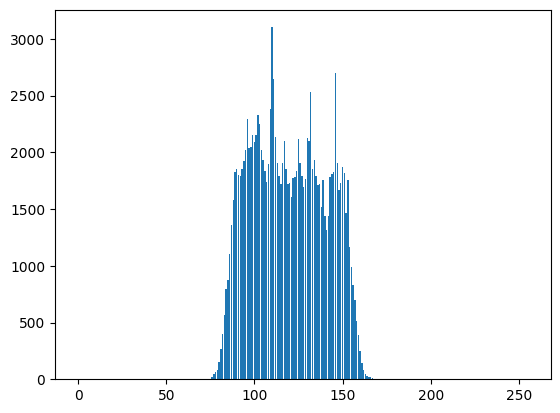

In [61]:
enhanced_image = stretch_hist(img)
calc_hist(enhanced_image)
#enhanced_image
#img.min()

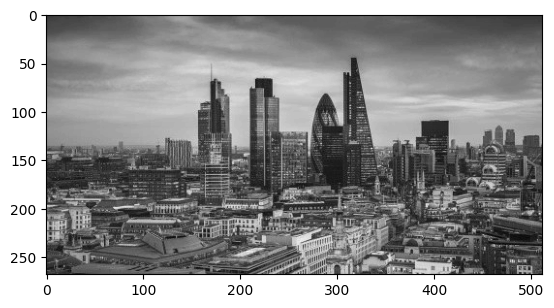

In [57]:
plt.imshow(enhanced_image,cmap='gray',vmin=0,vmax=255)
plt.show()

Q2-Part3

In [81]:
img1 = cv2.imread('img2.jpg',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img3.jpg',cv2.IMREAD_GRAYSCALE)

In [73]:
def equalize_hist(img_array):
  pixels=[]
  for x in range(256):
    pixels.append(x)
  width,height=img.shape
  size=width*height
  counts=[]
  for i in pixels:
    temp=0
    for x in range(width):
      for y in range(height):
        if (img[x][y]==i):
          temp=temp+1
    counts.append(temp)
  pdf=[]
  for i in counts:
    pdf.append(i/size) 
  cdf=[]
  total=0
  for i in pdf:
    total=total+i
    cdf.append(total)
  tr=[]
  for i in cdf:
    t=round(i*255)
    tr.append(t)
  hs=[]
  for i in pixels:
    count=0
    tot=0
    for j in tr:
      if (j==i):
        tot=tot+counts[count]
      count=count+1
    hs.append(tot)
  plt.bar(pixels,hs)
  plt.show()
##################################################################################
  histogram_array = np.bincount(img_array.flatten(), minlength=256)
  num_pixels = np.sum(histogram_array)
  histogram_array = histogram_array/num_pixels
  chistogram_array = np.cumsum(histogram_array)
  transform_map = np.floor(255 * chistogram_array).astype(np.uint8)
  img_list = list(img_array.flatten())
  eq_img_list = [transform_map[p] for p in img_list]
  eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
  return eq_img_array


test **(don't change next cell)**

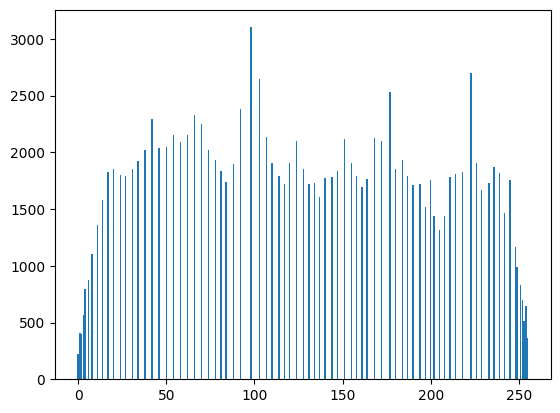

In [74]:
eq_img1 = equalize_hist(img1)


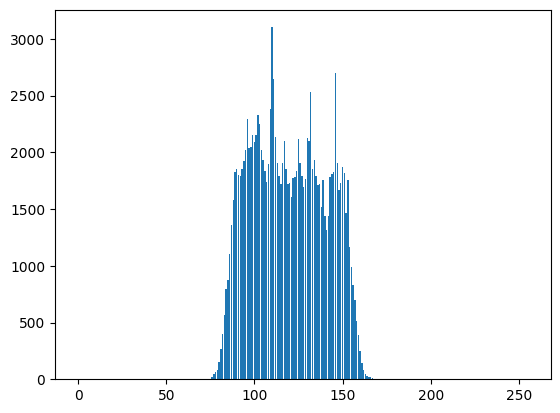

In [67]:
calc_hist(img1)

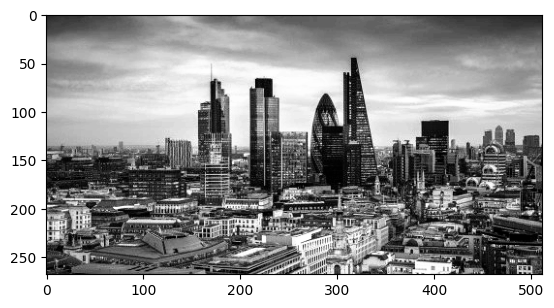

In [76]:
plt.imshow(eq_img1,cmap='gray',vmin=0,vmax=255)

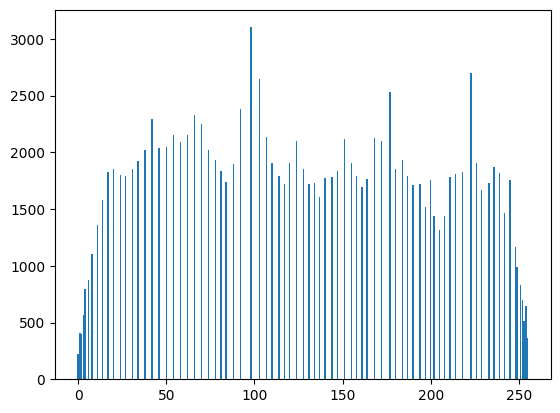

In [80]:
eq_img2 = equalize_hist(img2)

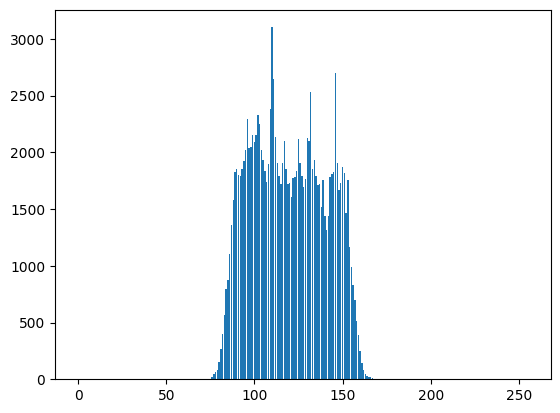

In [82]:
calc_hist(img2)

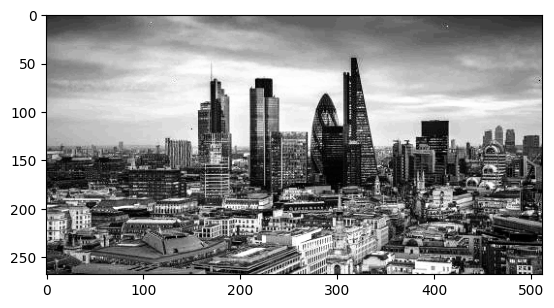

In [70]:
plt.imshow(eq_img2,cmap='gray',vmin=0,vmax=255)